In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [8]:
startups=pd.read_csv('50_Startups.csv')
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [20]:
startups.rename(columns={'R&D Spend': 'RndSpend','Marketing Spend': 'Marketing'}, inplace=True)
startups.head()

,RndSpend,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [21]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RndSpend        50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketing       50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [22]:
startups.corr()

,RndSpend,Administration,Marketing,Profit
RndSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [52]:
sns.pairplot(startups);

In [29]:
model=smf.ols('Profit~RndSpend+Administration+Marketing', data=startups).fit()
model.pvalues

Intercept         1.057379e-09
RndSpend          2.634968e-22
Administration    6.017551e-01
Marketing         1.047168e-01
dtype: float64

In [73]:
(model.rsquared,model.aic)

(0.9504503015559763, 1057.070772191826)

In [42]:
model1=smf.ols('Profit~RndSpend', data=startups).fit()
model1.pvalues

Intercept    2.782697e-24
RndSpend     3.500322e-32
dtype: float64

In [43]:
model2=smf.ols('Profit~Administration', data=startups).fit()
model2.pvalues

Intercept         0.003824
Administration    0.162217
dtype: float64

In [44]:
model3=smf.ols('Profit~Marketing', data=startups).fit()
model3.pvalues

Intercept    4.294735e-10
Marketing    4.381073e-10
dtype: float64

In [45]:
model4=smf.ols('Profit~RndSpend+Marketing', data=startups).fit()
model4.pvalues

Intercept    3.504062e-22
RndSpend     6.040433e-24
Marketing    6.003040e-02
dtype: float64

In [67]:
model5=smf.ols('Profit~RndSpend+Administration', data=startups).fit()
model5.pvalues

Intercept         5.695336e-12
RndSpend          2.278348e-31
Administration    2.888932e-01
dtype: float64

In [46]:
rsqr_RndSpend=smf.ols('RndSpend~Administration+Marketing', data=startups).fit().rsquared
vif_RndSpend = 1/(1-rsqr_RndSpend)
vif_RndSpend

2.4689030699947017

In [47]:
rsqr_Administration=smf.ols('Administration~RndSpend+Marketing', data=startups).fit().rsquared
vif_Administration = 1/(1-rsqr_Administration)
vif_Administration

1.1750910070550458

In [48]:
rsqr_Marketing=smf.ols('Marketing~RndSpend+Administration', data=startups).fit().rsquared
vif_Marketing = 1/(1-rsqr_Marketing)
vif_Marketing

2.3267732905308773

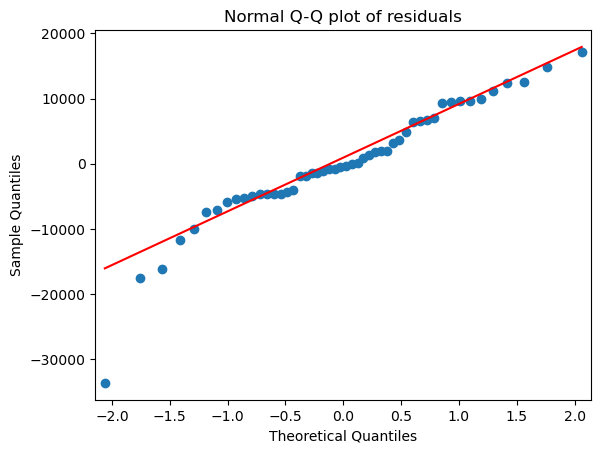

In [51]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [53]:
list(np.where(model.resid<-15000))

[array([14, 15, 49], dtype=int64)]

In [54]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

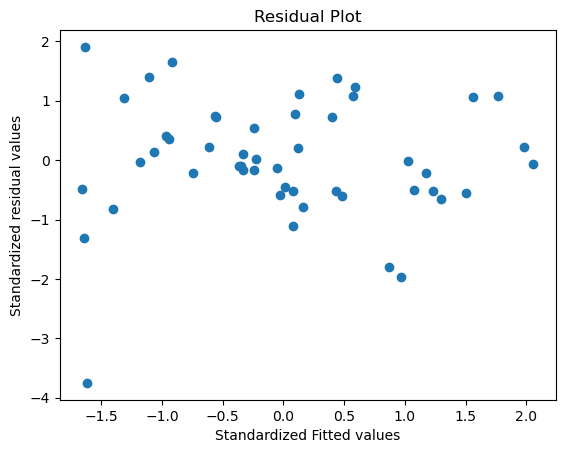

In [56]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [57]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

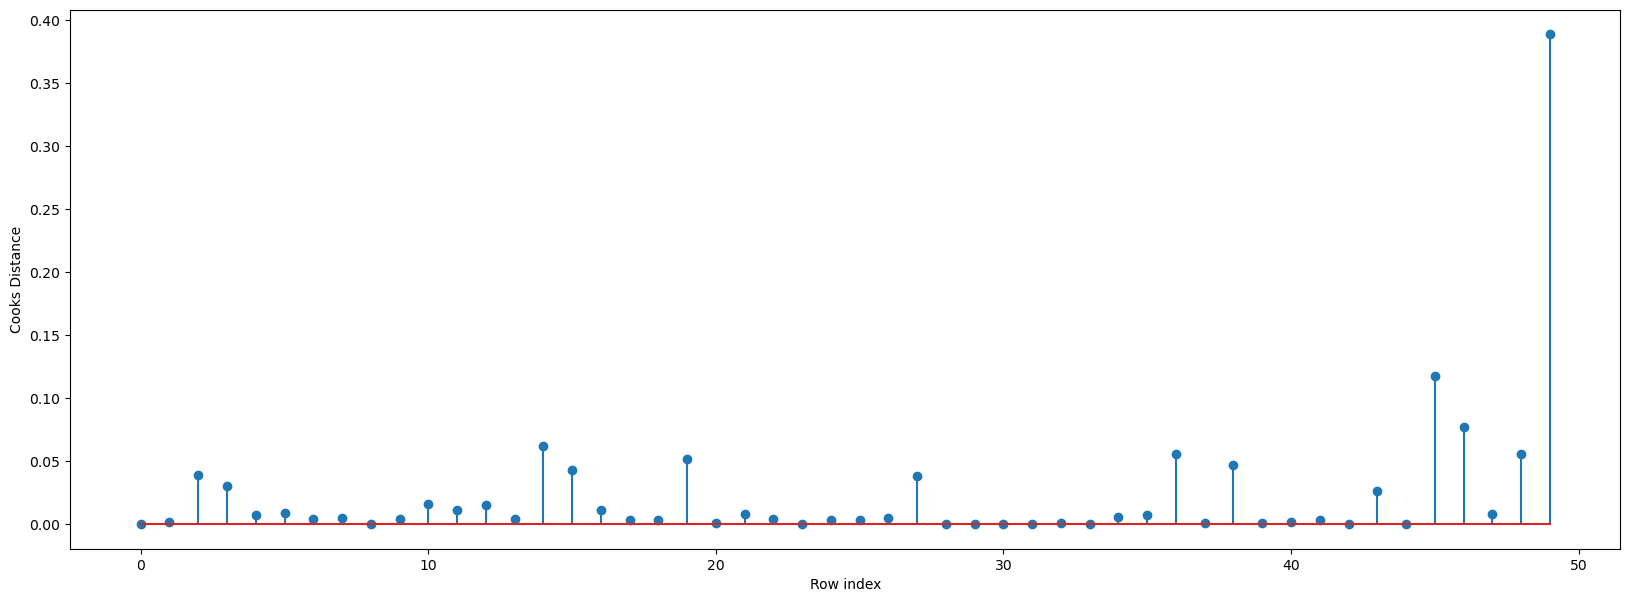

In [60]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startups)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [62]:
(np.argmax(c),np.max(c))

(49, 0.3894886227924922)

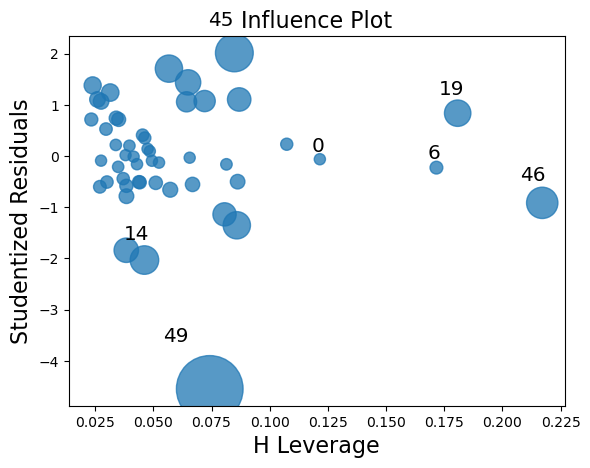

In [63]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [65]:
k = startups.shape[1]
n = startups.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [66]:
startups1=startups.drop(startups.index[[49]],axis=0).reset_index()
startups1=startups1.drop(['index'],axis=1)
startups1.head()

,RndSpend,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [69]:
model_final=smf.ols('Profit~RndSpend+Marketing', data=startups1).fit()
model_final.pvalues

Intercept    1.970460e-25
RndSpend     3.628510e-26
Marketing    4.084443e-02
dtype: float64

In [70]:
model_final_influence = model_final.get_influence()
(c, _) = model_final_influence.cooks_distance

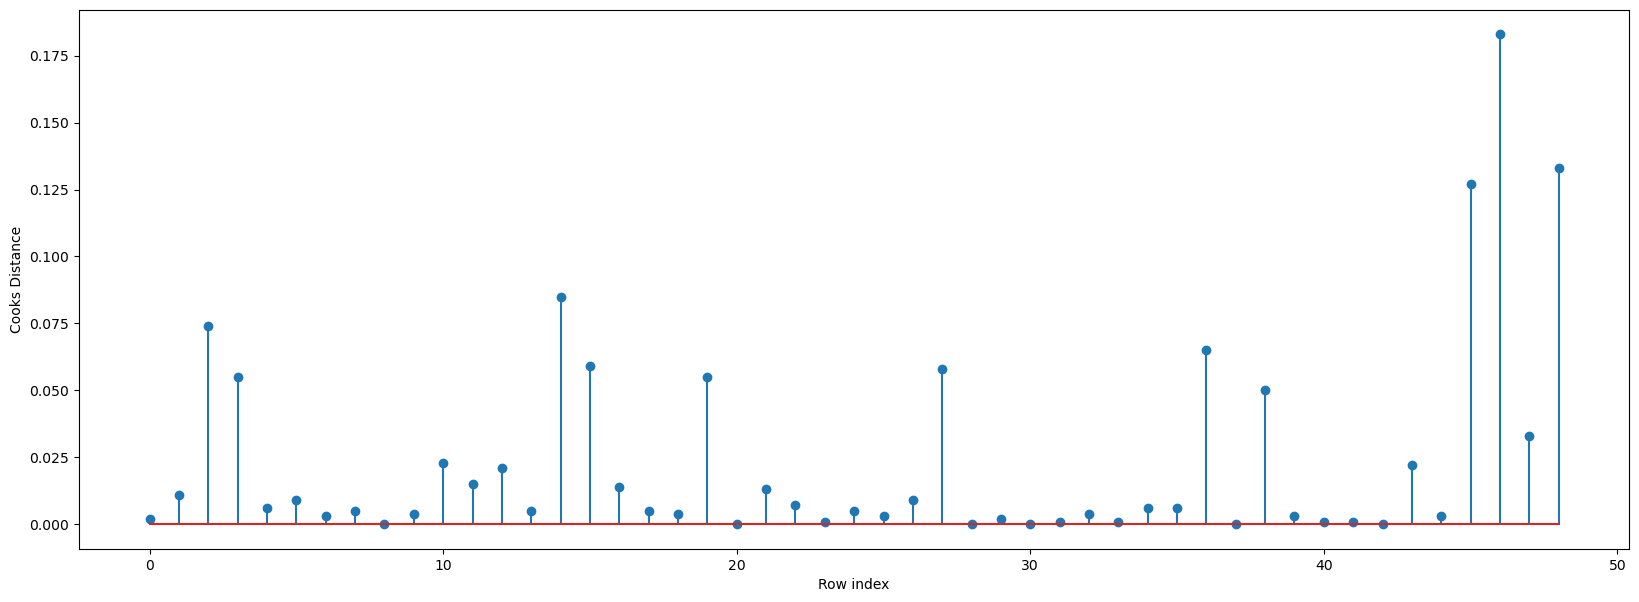

In [71]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startups1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

#### Since the value is <1 , we can stop the diagnostic process and finalize the model

In [74]:
(model_final.rsquared,model_final.aic)

(0.9610856807456628, 1018.8564801588338)

In [75]:
new_data=pd.DataFrame({'RndSpend':200000,'Marketing':450000},index=[1])

In [76]:
model_final.predict(new_data)

1    217212.522371
dtype: float64